In [ ]:
import numpy as np
from sklearn import preprocessing
from random import uniform, choice
#Вариант18
input_data = np.array([[5.1, -2.9, 3.3],
                 [-1.2, 7.8, -6.1],
                 [3.9, 0.4, 2.1],
                 [7.3, -9.9, -4.5]])

#Бинаризация данных
data_binarized = preprocessing.Binarizer(threshold = 0.0).transform(input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 1. 1.]
 [1. 0. 0.]]


In [ ]:
#Исключение среднего
"""Исключение среднего (стандартизация) - это процесс преобразования данных, при котором из каждого значения признака
вычитается среднее значение этого признака, а затем результат делится на стандартное отклонение."""
print("\nBEFORE:")
print("Mean =", input_data.mean(axis = 0))
print("Std deviation =", input_data.std(axis=0))

data_scaled = preprocessing.scale(input_data)
print(data_scaled)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis = 0))
print("std deviation =", data_scaled.std(axis = 0))
#для алгоритмо, чувствительных к данным, для улучшения сходимости градиентного спуска



BEFORE:
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]
[[ 0.42462551 -0.2748757   1.13244172]
 [-1.59434861  1.40579288 -1.18167831]
 [ 0.04005901  0.24346134  0.83702214]
 [ 1.12966409 -1.37437851 -0.78778554]]

AFTER:
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
std deviation = [1. 1. 1.]


In [ ]:
""" MinMaxScaler преобразует данные таким образом, чтобы они находились в заданном диапазоне (по умолчанию [0, 1]). Формула для каждого признака: X_scaled = (X - X_min) / (X_max - X_min) Таким образом, минимальное значение признака становится 0, максимальное — 1,
а все промежуточные значения оказываются в этом интервале."""
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range = (0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)


Min max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


In [ ]:
colors = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

encoder = preprocessing.LabelEncoder()
encoder.fit(colors)

for i, item in enumerate(encoder.classes_):
  print(item, '-->', i)

new_colors = ['green', 'red', 'black']
encoded_colors = encoder.transform(new_colors)
print(f"Закодированные цвета {new_colors}: {encoded_colors}")


codes = [3, 0, 4, 1]
decoded_colors = encoder.inverse_transform(codes)
print(f"Декодированные коды {codes}: {decoded_colors}")


black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4
Закодированные цвета ['green', 'red', 'black']: [1 2 0]
Декодированные коды [3, 0, 4, 1]: ['white' 'black' 'yellow' 'green']


Размерность данных: (400, 2)
Количество классов: 4


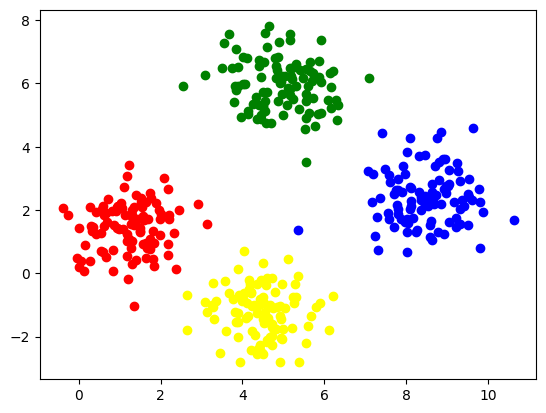

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
data_nb = np.loadtxt('data_multivar_nb.txt',  delimiter=',')
X = data_nb[:, :-1]
y = data_nb[:, -1]

print(f"Размерность данных: {X.shape}")
print(f"Количество классов: {len(np.unique(y))}")

colors = ['red', 'green', 'blue','yellow']
for i in range(4):
  plt.scatter(X[y==i,0], X[y==i,1],c=colors[i])
plt.show()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 4#количество классов

def normal_pdf(x, mu, sigma2):

    sigma = np.sqrt(sigma2)
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    return coefficient * np.exp(exponent)


def baes_classifier(class_k, x, x_i, y):
    n = len(y)
    P_y = np.sum(y == class_k) / n  # правильный расчет априорной вероятности

    x_k = x[y == class_k]
    mean0, mean1 = np.mean(x_k, axis=0)
    std0, std1 = np.std(x_k, axis=0, ddof=1)

    # Вероятности для каждого признака тестового образца
    p_x0 = normal_pdf(x_i[0], mean0, std0**2)
    p_x1 = normal_pdf(x_i[1], mean1, std1**2)

    return np.log(P_y) + np.log(p_x0) + np.log(p_x1)


In [ ]:
predict = []
for x_i in x_test:
  res = []
  for i in range(k):
    res.append(baes_classifier(i, x_train, x_i, y_train))
  predict.append(np.argmax(res))
Q = np.mean(y_test!=predict)#функционал качества - эмпирический риск
print('Эмпирический риск (ошибка классификации):', Q)

Эмпирический риск (ошибка классификации): 0.0125


In [ ]:
#Сравнение
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


# Создание и обучение классификатора
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = nb_classifier.predict(x_test)
Q = np.mean(y_pred!=y_test)
Q = np.mean(y_test!=predict)#функционал качества - эмпирический риск
print('Эмпирический риск (ошибка классификации):', Q)

Эмпирический риск (ошибка классификации): 0.0125


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#  Метрики качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nМетрики качества наивного байесовского классификатора:")
print(f"Accuracy (доля правильных ответов): {accuracy:.4f}")
print(f"Precision (точность предсказаний): {precision:.4f}")
print(f"Recall (полнота): {recall:.4f}")
print(f"F1-score (гармоническое среднее для проверки крайних значений): {f1:.4f}")


Метрики качества наивного байесовского классификатора:
Accuracy (доля правильных ответов): 0.9875
Precision (точность предсказаний): 0.9885
Recall (полнота): 0.9875
F1-score (гармоническое среднее для проверки крайних значений): 0.9876


In [ ]:
#Метрики качества модели
def metrics(class_k, y, predict):
  TP = np.sum((y == class_k ) & (predict==class_k))
  TN = np.sum((y != class_k) & (predict!=class_k))
  FP = np.sum((y != class_k) & (predict==class_k))
  FN = np.sum((y == class_k) & (predict!=class_k))
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  F1 = 2*precision*recall/(precision+recall)
  print(f"Accuracy (доля правильных ответов): {accuracy:.4f}")
  print(f"Precision (точность предсказаний): {precision:.4f}")
  print(f"Recall (полнота): {recall:.4f}")
  print(f"F1-score (гармоническое среднее для проверки крайних значений): {F1:.4f}")
  return precision, recall, F1

macro_precision, macro_recall, macro_f1 =0, 0, 0
for i in range(4):
  print('Метрики для класса', i)
  a,b,c = metrics(i, y_test, np.array(predict))
  macro_precision += a/4
  macro_recall += b/4
  macro_f1 += c/4
  print()
print("Macro-average (простое среднее по классам):")
print(f"Precision: {macro_precision:.3f}")
print(f"Recall:    {macro_recall:.3f}")
print(f"F1-score:  {macro_f1:.3f}")


Метрики для класса 0
Accuracy (доля правильных ответов): 1.0000
Precision (точность предсказаний): 1.0000
Recall (полнота): 1.0000
F1-score (гармоническое среднее для проверки крайних значений): 1.0000

Метрики для класса 1
Accuracy (доля правильных ответов): 1.0000
Precision (точность предсказаний): 1.0000
Recall (полнота): 1.0000
F1-score (гармоническое среднее для проверки крайних значений): 1.0000

Метрики для класса 2
Accuracy (доля правильных ответов): 0.9875
Precision (точность предсказаний): 1.0000
Recall (полнота): 0.9545
F1-score (гармоническое среднее для проверки крайних значений): 0.9767

Метрики для класса 3
Accuracy (доля правильных ответов): 0.9875
Precision (точность предсказаний): 0.9167
Recall (полнота): 1.0000
F1-score (гармоническое среднее для проверки крайних значений): 0.9565

Macro-average (простое среднее по классам):
Precision: 0.979
Recall:    0.989
F1-score:  0.983


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

income_data = pd.read_csv('income_data.txt', delimiter=',')

# Последний столбец - целевая переменная
x_income = income_data.iloc[:, :-1]
y_income = income_data.iloc[:, -1]


# Предварительная обработка данных
# нахождение всех столцов с категориальными(тестовыми) данными
categorical_columns = x_income.select_dtypes(include=['object']).columns

# кодировка категориальных признаков
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    x_income[col] = le.fit_transform(x_income[col].astype(str))
    label_encoders[col] = le

# Также кодируем целевую переменную, если она категориальная
if y_income.dtype == 'object':
    le_target = LabelEncoder()
    y_income = le_target.fit_transform(y_income)

scaler = StandardScaler()
numerical_columns = x_income.select_dtypes(include=[np.number]).columns
x_income[numerical_columns] = scaler.fit_transform(x_income[numerical_columns])

print("\nДанные после обработки:")
print(x_income.head())

x_train, x_test, y_train, y_test =  train_test_split(x_income, y_income, test_size = 0.2, random_state=42)

svm_classifier = SVC(kernel = 'linear', random_state = 42)
svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)


Данные после обработки:
         39   State-gov     77516   Bachelors        13   Never-married  \
0  0.837097    1.463883 -1.008742   -0.335443  1.134779       -0.406183   
1 -0.042640    0.090121  0.245046    0.181319 -0.420027       -1.734026   
2  1.057031    0.090121  0.425770   -2.402489 -1.197429       -0.406183   
3 -0.775755    0.090121  1.408146   -0.335443  1.134779       -0.406183   
4 -0.115952    0.090121  0.898170    0.439700  1.523480       -0.406183   

    Adm-clerical   Not-in-family     White      Male      2174         0  \
0      -0.608434       -0.900177  0.393675  0.703087 -0.145914 -0.216663   
1      -0.135480       -0.277810  0.393675  0.703087 -0.145914 -0.216663   
2      -0.135480       -0.900177 -1.962583  0.703087 -0.145914 -0.216663   
3       0.810427        2.211658 -1.962583 -1.422298 -0.145914 -0.216663   
4      -0.608434        2.211658  0.393675 -1.422298 -0.145914 -0.216663   

        40   United-States  
0 -2.22212        0.291573  
1 -0.0354

In [ ]:
# Получаем количество классов из целевой переменной
n_classes = len(np.unique(y_income))

macro_precision, macro_recall, macro_f1 = 0, 0, 0
for i in range(n_classes):
    print(f'Метрики для класса {i}')
    a, b, c = metrics(i, y_test, y_pred)
    macro_precision += a / n_classes
    macro_recall += b / n_classes
    macro_f1 += c / n_classes
    print()

print("Macro-average (простое среднее по классам):")
print(f"Precision: {macro_precision:.3f}")
print(f"Recall:    {macro_recall:.3f}")
print(f"F1-score:  {macro_f1:.3f}")

# Общая точность SVM
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"\nОбщая точность SVM: {overall_accuracy:.3f}")
print(f"Эмпирический риск: {1 - overall_accuracy:.3f}")


Метрики для класса 0
Accuracy (доля правильных ответов): 0.8153
Precision (точность предсказаний): 0.8173
Recall (полнота): 0.9725
F1-score (гармоническое среднее для проверки крайних значений): 0.8882

Метрики для класса 1
Accuracy (доля правильных ответов): 0.8153
Precision (точность предсказаний): 0.7976
Recall (полнота): 0.3325
F1-score (гармоническое среднее для проверки крайних значений): 0.4693

Macro-average (простое среднее по классам):
Precision: 0.807
Recall:    0.653
F1-score:  0.679

Общая точность SVM: 0.815
Эмпирический риск: 0.185


In [ ]:
import torch

# тензор X в программе не менять
batch_size = 32 # количество входных данных
X = torch.tensor(list(map(float, input().split())), dtype=torch.float32).view(batch_size, 2)

W1 = torch.tensor([(3, -4), (9, -5)], dtype=torch.float32)
bias1 = torch.tensor([18, 12], dtype=torch.float32)
W2 = torch.tensor([ -0.5,0.5 ], dtype=torch.float32)
bias2 = torch.tensor([-0.5], dtype=torch.float32)
predict = W2@(W1@X.permute(1,0)+bias1).permute(1,0)+bias2